# KOSPI200

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

KOSPI200_list = []
for count in range(1,557):
    
    url = 'https://finance.naver.com/sise/sise_index_day.nhn?code=KPI200'
    params = {
        'page' : count
    }



    resp = requests.get(url, params = params)
    soup = BeautifulSoup(resp.content, 'html.parser')

    frame = soup.find('div', class_ = 'box_type_m').find(class_ = 'type_1')
    target = frame.find_all('tr')

    target = target[2:]


    for tr in target:
        
        list_all = {}
        try:
            
            date = tr.find(class_ = 'date').text.replace('.', '')
            list_all['year'] = date[:4]
            list_all['date'] = date
            list_all['price'] = tr.find(class_ = 'number_1').text
            
            KOSPI200_list.append(list_all)
        except AttributeError:
            pass



print(len(KOSPI200_list))
  
    


3892


# S&P500

In [3]:
from bs4 import BeautifulSoup
import requests
import json

SP500_list = []
for count in range(1,500,1):

    url = 'https://finance.naver.com/world/worldDayListJson.nhn?symbol=SPI@SPX&fdtc=0'
    params = {
        'page' : count
    }

    
    resp = requests.get(url, params)
    text = resp.text
    soup = json.loads(text)
    for item in soup:
        
        all_list = {}
        all_list['year'] = item['xymd'][:4]
        all_list['date'] = item['xymd']
        all_list['price'] = item['clos']
        
        SP500_list.append(all_list)
    
print(len(SP500_list))

        

4872


In [5]:
df1 = pd.DataFrame(KOSPI200_list)
df1

,date,price,year
0,20190703,272.37,2019
1,20190702,275.97,2019
2,20190701,277.27,2019
3,20190628,277.50,2019
4,20190628,277.50,2019
5,20190627,277.75,2019
6,20190626,275.53,2019
7,20190625,275.28,2019
8,20190624,275.58,2019
9,20190621,275.48,2019


In [6]:
type(df1)

pandas.core.frame.DataFrame

In [7]:
df1.to_csv('check.csv')

In [8]:
dfSP = pd.DataFrame(SP500_list)
dfSP



,date,price,year
0,20190702,2973.01,2019
1,20190701,2964.33,2019
2,20190628,2941.76,2019
3,20190627,2924.92,2019
4,20190626,2913.78,2019
5,20190625,2917.38,2019
6,20190624,2945.35,2019
7,20190621,2950.46,2019
8,20190620,2954.18,2019
9,20190619,2926.46,2019


In [256]:
df = pd.merge(df1.head(4500), dfSP.head(4500), on = ['date','year'])
print(type(df1), type(dfSP))
print(df.info())
print(df)


<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3778 entries, 0 to 3777
Data columns (total 4 columns):
date       3778 non-null object
price_x    3778 non-null object
year       3778 non-null object
price_y    3778 non-null float64
dtypes: float64(1), object(3)
memory usage: 147.6+ KB
None
          date price_x  year  price_y
0     20190702  275.97  2019  2973.01
1     20190701  277.27  2019  2964.33
2     20190628  277.50  2019  2941.76
3     20190628  277.50  2019  2941.76
4     20190627  277.75  2019  2924.92
5     20190626  275.53  2019  2913.78
6     20190625  275.28  2019  2917.38
7     20190624  275.58  2019  2945.35
8     20190621  275.48  2019  2950.46
9     20190620  276.01  2019  2954.18
10    20190620  276.01  2019  2954.18
11    20190619  275.31  2019  2926.46
12    20190618  271.36  2019  2917.75
13    20190617  270.09  2019  2889.67
14    20190614  270.48  2019  2886.98
15    20190613  271.13

In [257]:
df['date'] = pd.to_datetime(df['date'])

#df['date'] = df.date.values.astype('M8[D]')


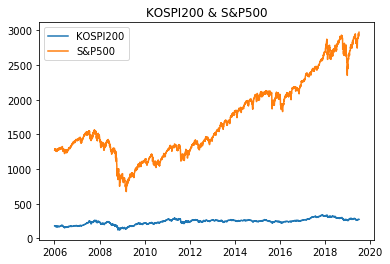

In [258]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

plt.plot(df['date'], pd.to_numeric(df['price_x']))
#KOSPI200 = pd.to_numeric(df['price_x']).plot.line(color = 'green')
plt.plot(df['date'], df['price_y'])
plt.title('KOSPI200 & S&P500')
plt.legend(['KOSPI200', 'S&P500'])

plt.show()

In [209]:
print(type(df[-1:]['price_y']))

<class 'pandas.core.series.Series'>


In [265]:
df

,date,price_x,year,price_y
0,2019-07-02,275.97,2019,2973.01
1,2019-07-01,277.27,2019,2964.33
2,2019-06-28,277.50,2019,2941.76
3,2019-06-28,277.50,2019,2941.76
4,2019-06-27,277.75,2019,2924.92
5,2019-06-26,275.53,2019,2913.78
6,2019-06-25,275.28,2019,2917.38
7,2019-06-24,275.58,2019,2945.35
8,2019-06-21,275.48,2019,2950.46
9,2019-06-20,276.01,2019,2954.18


In [266]:
index_x = pd.to_numeric(df['price_x'])/ 179.91 * 100
#가장 최근 값 부터 마지막까지 index 계산


index_y = df['price_y'] / 1273.46 * 100
#index_y = df['price_y'] / df[-1:]['price_y'] * 100

print(index_x)
print(index_y)

print(df[-1:])

0       153.393363
1       154.115947
2       154.243789
3       154.243789
4       154.382747
5       153.148797
6       153.009838
7       153.176588
8       153.121005
9       153.415597
10      153.415597
11      153.026513
12      150.830971
13      150.125063
14      150.341838
15      150.703129
16      151.598021
17      151.598021
18      151.859263
19      151.242288
20      149.113446
21      148.957812
22      148.774387
23      149.052304
24      149.052304
25      146.678895
26      146.701128
27      145.278195
28      147.129120
29      146.973487
           ...    
3748     95.981324
3749     95.981324
3750     95.008615
3751     94.180424
3752     95.820132
3753     96.526041
3754     95.975766
3755     98.893891
3756     98.893891
3757     98.977266
3758    100.411317
3759     99.294091
3760     97.109666
3761     96.448224
3762     95.486632
3763     95.486632
3764     93.402257
3765     94.825190
3766     97.231949
3767     96.609416
3768     99.088433
3769    101.

# 왜 안될까!!! 

In [275]:
dt.date(2006,1,4)
df['price_y'].loc[dt.date(2006,1,10)]

KeyError: datetime.date(2006, 1, 10)

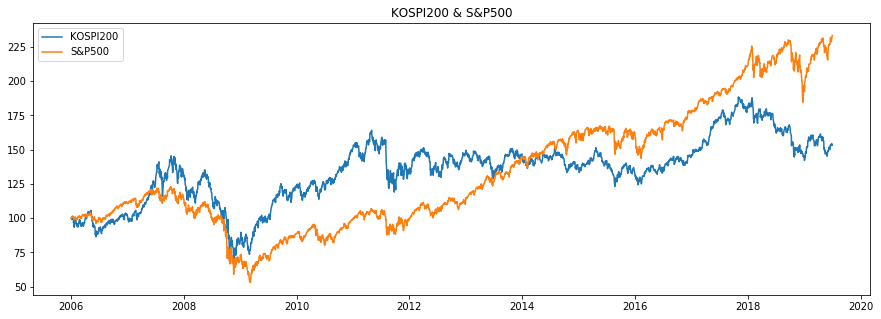

In [268]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

plt.figure(figsize=(15,5))
plt.plot(df['date'], index_x)
plt.plot(df['date'], index_y)
plt.title('KOSPI200 & S&P500')
plt.legend(['KOSPI200', 'S&P500'])

plt.show()

KeyError: datetime.date(2010, 10, 22)

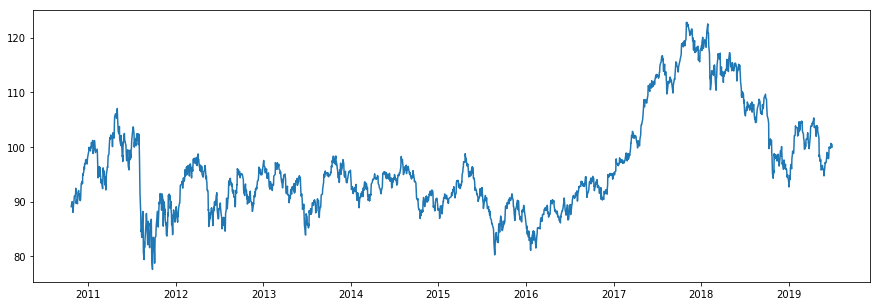

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import datetime as dt

plt.figure(figsize=(15,5))
plt.plot(df['date'], pd.to_numeric(df['price_x'])/ pd.to_numeric(df['price_x'][0]) * 100)
#KOSPI200 = pd.to_numeric(df['price_x']).plot.line(color = 'green')
plt.plot(df['price_y'] / df['price_y'].loc[dt.date(2010,10,22)] * 100)
plt.title('KOSPI200 & S&P500')
plt.legend(['KOSPI200', 'S&P500'])

plt.show()

In [60]:
import datetime as dt
dt.date(2010,10,22)

datetime.date(2010, 10, 22)

# Yahoo hinance를 활용한 수정주가 조회


In [ ]:
import pandas as pd
import numpy as np
import datetime
from pandas_datareader import data

start_date = '2019-01-02'
end_date = '2019-05-17'

df = data.get_data_yahoo('005930.KS', start_date , end_date)
df.tail()
#colab에서 하면 돌아감! colab이 되는 이유는 쥬피터를 구글이 함께 만들었는데 colab에서도 쥬피터 환경을 
#제공함. colab에서 코딩을 하면 구글 서버로 갔다가 야후로 가기 때문에 아이피 우회 가능